# Métricas

## Matriz de confusión
Una matriz de confusión es una herramienta que nos permite visualizar el desempeño de un algoritmo. Esta matriz está compuesta de los valores reales y los valores predichos por el algoritmo. La idea es comparar el valor real y el valor predicho. Permite ver si las clasificaciones son correctas.

Una matriz de confusión se basa en un conjunto de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

Para poder utilizar este metodo de evaluación de un modelo de clasificación necesitamos separa nuestra data de entrenamiento en dos datasets.

* Train (por ejemplo, 80%)
* Test (20%)

Lo que haremos es entrenar el modelo utilizando las observaciones que estan en el dataset train y luego evaluaremos el modelo utilizando las observaciones del dataset test.

Esto nos ayudar a medir como se comporta nuestro modelo cuando se lo aplicamos a data nueva. La matriz tiene la siguiente estructura.

<img src="Matriz_confusion_generica.png" align = "middle" width="400" height="350">

* VP es la cantidad de positivos que fueron clasificados correctamente como positivos por el modelo.
* VN es la cantidad de negativos que fueron clasificados correctamente como negativos por el modelo.
* FN es la cantidad de positivos que fueron clasificados incorrectamente como negativos.
* FP es la cantidad de negativos que fueron clasificados incorrectamente como positivos.

A partir de la matriz de confusión se pueden precisar dos métricas muy utilizadas: Precision y Recall.

### Precisión
La idea de esta métricas es responder a la pregunta: Cuando predice positivos, qué porcentaje clasifica correctamente?

<img src="precision.png" align = "middle" width="300" height="250">

Esto es una forma de darnos cuenta de qué tan bien está generalizando nuestro algoritmo. lo que buscamos es que el número de precisión tienda a uno. Si el resultado es 1, quiere decir que tiene precisión perfecta. 

### Sensibilidad o Recall
La idea de esta métrica es responder a la pregunta: Cuando la clase es positiva, qué porcentaje logra clasificar?

<img src="recall.png" align = "middle" width="300" height="250">

Visto de otra manera. ¿Qué proporción de instancias que eran efectivamente positivas, fue marcada como positivas por el algoritmo?

### ROC AUC

Las curvas ROC (Receiver Operating Characteristic) presentan la sensibilidad de una prueba diagnóstica que produce resultados contínuos, en función de los falsos positivos (complementario de la especificidad), para distintos puntos de corte.

La separación entre los grupos representa la capacidad discriminatoria de una prueba para clasificar correctamente a cada objeto. Un parámetro para evaluar la bondad de un algoritmo que produce resultados contínuos es el área bajo la curva (AUC). Este área puede interpretarse como la probabilidad de que un conjunto de objetos, uno de cada clase, el algoritmo los clasifique correctamente.

<img src="especificity.png" align = "middle" width="200" height="150">

Si tenemos un ROC de 1, quiere decir que el algoritmo está clasificando todo correctamente.




La curva ROC es una herramienta estadística utilizada para analizar la capacidad discriminante de una prueba diagnóstica dicotómica. Es decir, una prueba, basada en una variable de decisión, cuyo objetivo es clasificar a los individuos de una población en dos grupos: uno que presente un evento de interés y otro que no. Esta capacidad discriminante está sujeta al valor umbral elegido de entre todos los posibles resultados de la variable de decisión, es decir, la variable por cuyo resultado se clasica a cada individuo en un grupo u otro.

La curva es el gráco resultante de representar, para cada valor umbral, las medidas de sensibilidad y especicidad de la prueba diagnóstica. Por un lado, la sensibilidad cuantica la proporción de individuos que presenta el evento de interés y que son clasicados por la prueba como portadores de dicho evento.
Por otro lado, la especicidad cuantica la proporción de individuos que no lo presentan y son clasicados por la prueba como tal.


## GridSearch
Automatiza la tarea de probar nuestros algoritmos con diferentes valores de los parámetros a partir de una grilla de valores posibles. Al finalizar, devuelve el conjunto de parámetros para los cuales el algoritmo generaliza mejor.


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 

# Importamos dataset iris de scikitlearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Dividimos en train test el conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Corremos un clasificador
classifier = DecisionTreeClassifier()
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función de scikit-learn imprime y plotea 
    la matriz de confusión pasada por parámetro. 
    Si se le pasa por parámetro 
    `normalize=True`, se le aplicará una normalización.

    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusión sin normalizar')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de confusión normalizada')

plt.show()

Matriz de confusión sin normalizar
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Matriz de confusión normalizada
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

## GridSeach 

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.25,
                                                    random_state=33)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = [
    {'max_depth': [2, 3, 4, 10, 5, 15, 50], 'max_features': [2, 4, 6, 8]},
]


In [30]:
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\llamas\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, 10, 5, 15, 50],
                          'max_features': [2, 4, 6, 8]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             s

## Propiedades de GridSearch

In [31]:
grid_search.best_params_

{'max_depth': 50, 'max_features': 8}

In [32]:
# Este devuelve el mejor modelo
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=8,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [33]:
grid_search.cv_results_['mean_train_score']

array([-4.67e+01, -3.31e+01, -2.91e+01, -3.01e+01, -3.22e+01, -2.51e+01,
       -2.14e+01, -1.92e+01, -2.59e+01, -1.55e+01, -1.61e+01, -1.12e+01,
       -1.84e+00, -1.04e+00, -8.64e-01, -5.25e-01, -1.58e+01, -1.26e+01,
       -7.63e+00, -6.31e+00, -6.25e-02, -1.44e-02, -2.41e-02, -3.34e-02,
        0.00e+00, -2.50e-32,  0.00e+00,  0.00e+00])

In [34]:
np.sqrt(-grid_search.cv_results_['mean_train_score'])

array([ 6.83e+00,  5.75e+00,  5.40e+00,  5.49e+00,  5.67e+00,  5.01e+00,
        4.62e+00,  4.39e+00,  5.09e+00,  3.94e+00,  4.02e+00,  3.34e+00,
        1.36e+00,  1.02e+00,  9.30e-01,  7.25e-01,  3.97e+00,  3.55e+00,
        2.76e+00,  2.51e+00,  2.50e-01,  1.20e-01,  1.55e-01,  1.83e-01,
       -0.00e+00,  1.58e-16, -0.00e+00, -0.00e+00])

In [35]:
np.sqrt(-grid_search.cv_results_['mean_test_score'])

array([7.7 , 6.08, 5.68, 5.95, 7.38, 5.14, 5.42, 5.41, 6.99, 5.68, 5.19,
       4.48, 5.21, 5.73, 5.25, 4.43, 5.69, 5.58, 5.83, 4.34, 5.61, 5.43,
       4.56, 4.59, 6.68, 5.29, 5.  , 4.13])

## RandomizedSearch

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_grid = {'max_depth': sp_randint(2, 50), 'max_features': sp_randint(2, 14)}


In [52]:
tree_reg = DecisionTreeRegressor()
rand_search = RandomizedSearchCV(tree_reg, param_distributions=param_grid, cv=5,
                                 scoring='neg_mean_squared_error',
                                 n_iter=10,
                                 return_train_score=True)

rand_search.fit(X_train, y_train)

C:\Users\llamas\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_di

In [53]:
rand_search.best_params_

{'max_depth': 27, 'max_features': 11}

In [54]:
rand_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=27, max_features=11,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [55]:
np.sqrt(-rand_search.cv_results_['mean_train_score'])

array([-0.  ,  0.16, -0.  , -0.  ,  3.31,  0.17,  0.02,  3.28,  3.56,
        0.63])

In [56]:
np.sqrt(-rand_search.cv_results_['mean_test_score'])

array([4.68, 5.12, 4.86, 4.08, 4.94, 5.68, 5.4 , 4.99, 4.76, 4.41])

In [57]:
# Comparamos los resultados entre Randomizedsearch y GridSearch
print("Promedio GridSearch RMSE: ", np.sqrt(-grid_search.cv_results_['mean_test_score']).mean())
print("Promedio RandomizedSearch RMSE: ", np.sqrt(-rand_search.cv_results_['mean_test_score']).mean())

Promedio GridSearch RMSE:  5.515053805776572
Promedio RandomizedSearch RMSE:  4.891164315181499


## Cambiando el scoring en GridSearch

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = [
    {'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]},
]
tree_reg = DecisionTreeRegressor()
grid_search_r2 = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='r2', return_train_score=True)
grid_search_r2.fit(X_train, y_train)

C:\Users\llamas\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4],
                          'max_features': [2, 4, 6, 8]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', ve

## Evaluación en test set

In [40]:
y_pred = grid_search.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.4660728824180085

In [43]:
y_pred = rand_search.predict(X_test)

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.955056922171251

In [45]:
y_pred = grid_search_r2.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.074217643538162

## Oversampling 

Ejemplo extra de oversample

Automatically created module for IPython interactive environment


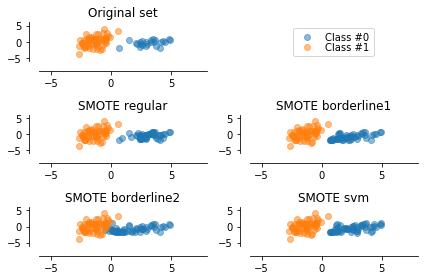

In [48]:
# Authors: Fernando Nogueira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=80, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()